# Deep Learning Project | Potato Disease Classification | SEQUENTIAL

In [1]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

Constants to be used

Dataset used from here: https://www.kaggle.com/datasets/arjuntejaswi/plant-village

In [2]:
IMAGE_SIZE = 299
BATCH_SIZE = 24
CHANNELS = 4
EPOCH = 50

Declare 'dataset' directory

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/REYES/OneDrive/Desktop/CNN_Projects/DATASETS/AMPALAYA_DS", #Folder name or directory
    shuffle=True, #shuffles dataset
    image_size = (IMAGE_SIZE, IMAGE_SIZE), #Fixed Image Dimensions
    batch_size = BATCH_SIZE, #Batch Size
)

Found 1400 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names #Stores class_names from different folder in variable
class_names

['Healthy',
 'Nitrogen Deficient',
 'Nitrogen and Potassium Deficient',
 'Potassium Deficient']

In [24]:
len(dataset)

93

This basically shows how we can plot the images

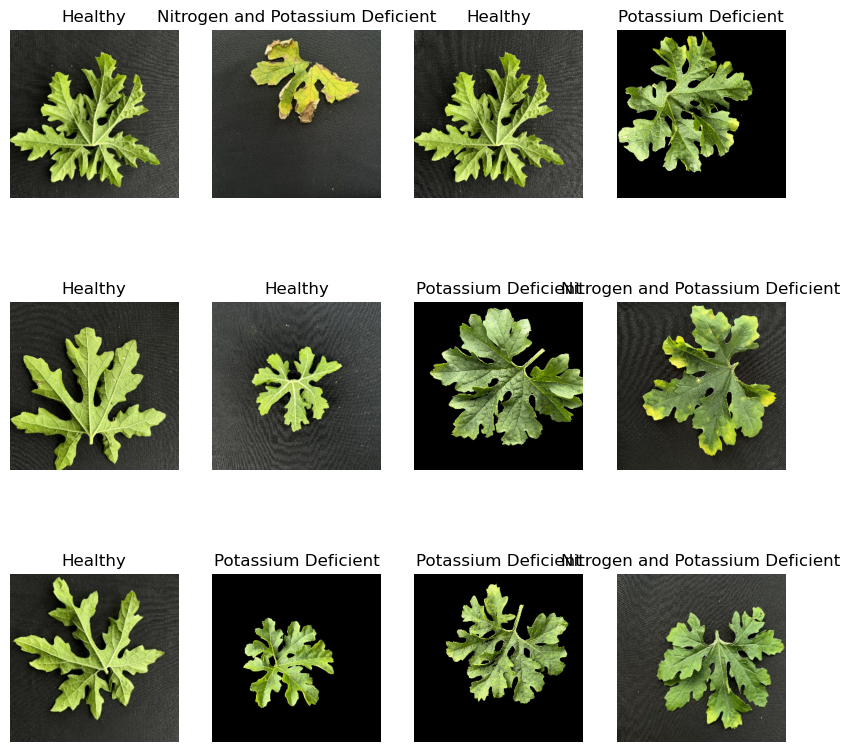

In [5]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    batch_size = image_batch.shape[0]  # get the actual number of images in the batch
    for i in range(min(12, batch_size)):  # loop through the batch but cap it at 12
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # "uint8" because default value is float
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [7]:
len(dataset)

278

# Splitting Dataset to 80-10-10, training, validation and test respectively

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    #get length of dataset
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12) #shuffles dataset before splitting
    
    #computer percentage accordingly from dataset size
    train_size = int(train_split * ds_size) #muliplies train_split parameter to dataset size
    val_size = int(val_split * ds_size) #muliplies val_split parameter to dataset size
    
    train_ds = ds.take(train_size) #stores train_size values
    
    val_ds = ds.skip(train_size).take(val_size) #takes val_size from skipped dataset size
    test_ds = ds.skip(train_size).skip(val_size) 
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
#Confirm sizes of each partitions
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

47
5
7


# Cache, Shuffle and Pre-Fetch Dataset

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
#caches leaf images in the memory to imrprove performance
#prefetch will load the next batch from disk if either CPU or GPU is busy
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model | Pre-Processing

Image Augmentation


In [10]:
#Resizing and Scaling the data | LAYERS
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resizes image
    tf.keras.layers.Rescaling(1.0/299)  # Scales RGB between 0 and 1
])

In [11]:
#Other augmentation techniques | LAYERS
data_augmentation = tf.keras.Sequential([
     tf.keras.layers.RandomFlip("horizontal_and_vertical"), #changes image orientation
     tf.keras.layers.RandomRotation(0.2), #Rotates images
])

# Model structure

In [12]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=(299, 299, 3)), #Explicitly define the input shape here
    resize_and_rescale,
    data_augmentation,
    
    #Convolutional Layer
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'), #Respectively: Filter Amount, Filter Size, Activation Layer & Input Shape || relu = "Rectified Linear Unit"
    
    #Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    #The rest of the layers
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #Flatten Layer
    layers.Flatten(),
    
    #Dense Layer
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

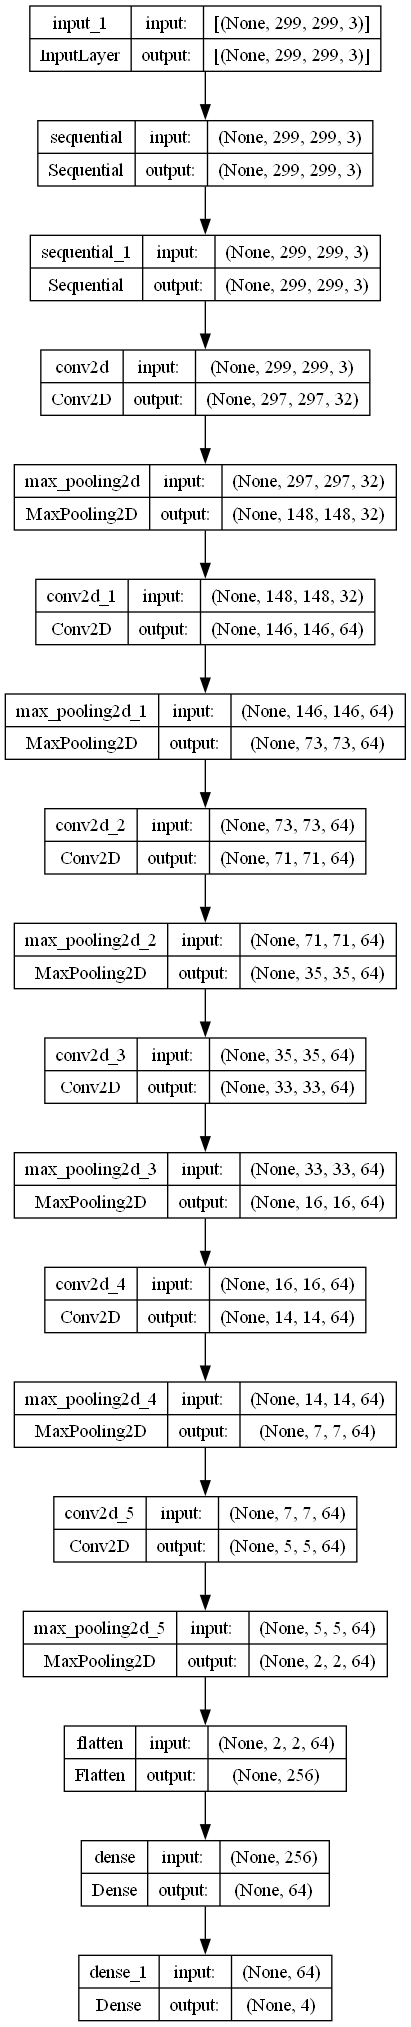

In [15]:
import keras
keras.utils.plot_model(model, show_shapes=True)
#model.summary() #Get summary of model layer

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Training the model

In [17]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/50
47/47 [==============================] - 70s 558ms/step - loss: 1.3604 - accuracy: 0.2986 - val_loss: 1.2928 - val_accuracy: 0.4750
Epoch 2/50
47/47 [==============================] - 8s 156ms/step - loss: 1.2340 - accuracy: 0.4326 - val_loss: 1.2404 - val_accuracy: 0.3917
Epoch 3/50
47/47 [==============================] - 5s 117ms/step - loss: 1.1642 - accuracy: 0.4613 - val_loss: 1.1249 - val_accuracy: 0.5250
Epoch 4/50
47/47 [==============================] - 5s 116ms/step - loss: 1.0694 - accuracy: 0.5189 - val_loss: 1.0487 - val_accuracy: 0.5667
Epoch 5/50
47/47 [==============================] - 5s 116ms/step - loss: 0.9519 - accuracy: 0.5827 - val_loss: 0.9768 - val_accuracy: 0.5583
Epoch 6/50
47/47 [==============================] - 5s 116ms/step - loss: 0.8824 - accuracy: 0.6151 - val_loss: 0.9799 - val_accuracy: 0.5083
Epoch 7/50
47/47 [==============================] - 5s 116ms/step - loss: 0.8370 - accuracy: 0.6313 - val_loss: 0.8312 - val_accuracy: 0.6250
Epoch

# Evaluating the model

In [18]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 17s 22ms/step - loss: 0.7854 - accuracy: 0.8095


In [20]:
scores

[0.7853686809539795, 0.8095238208770752]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 74}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Plotting Accuracy and Loss

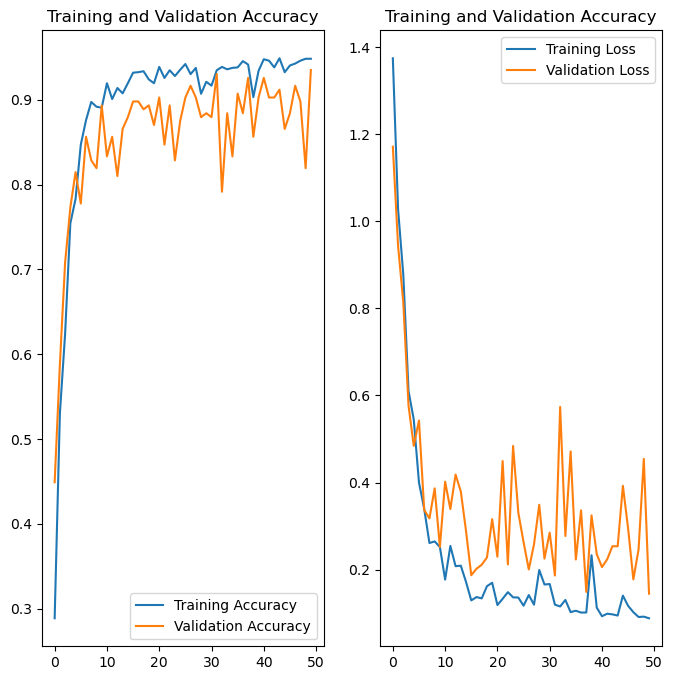

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.show()

# Making a Prediction

Image to predict
Actual label:  Nitrogen Deficient
1/1 [==============================] - 0s 29ms/step
Prediction:  Nitrogen Deficient


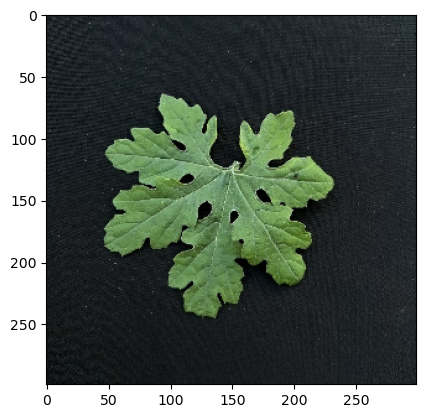

In [31]:
for image_batch, label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    
    print("Image to predict")
    plt.imshow(first_image)
    print("Actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Prediction: ", class_names[np.argmax(batch_prediction[0])])


Function for prediction

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


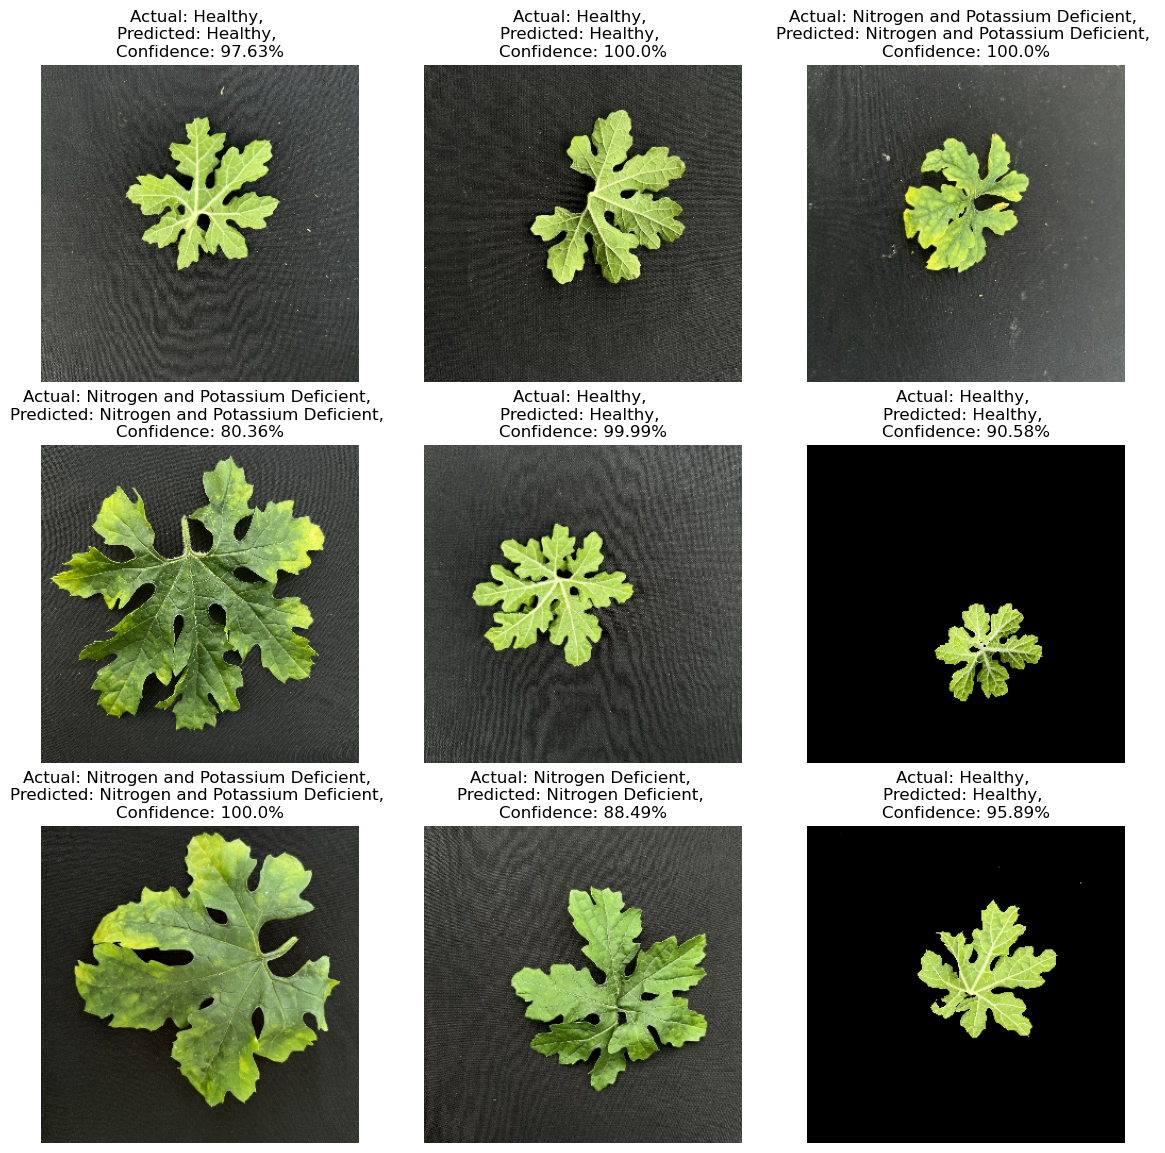

In [33]:
plt.figure(figsize=(14, 14))
for images, labels in test_ds.take(1):
    batch_size = images.shape[0]  # get the actual number of images in the batch
    for i in range(min(9, batch_size)):  # ensure you don't exceed the available number of images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}, \nConfidence: {confidence}%")
        plt.axis("off")


# Saving/Exporting Model

In [45]:
model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets
